In [1]:
from astropy.io import fits
import numpy as np
import astropy
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
path = '/home/suman/tifr/'
file = path + '202307011_1506_Am241_on_det1_30000pkts.fits'

hdul = fits.open(file)[1]

In [3]:
data = hdul.data
tab = Table(data)
tab

time,detid,pixid,pha
uint32,int16,int16,int16
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
...,...,...,...
729060084,1,181,599
729060133,1,0,346


In [4]:
data['pixid']

array([  0,   0,   0, ..., 165, 101, 154], dtype=int16)

In [5]:
data['detid']

array([0, 0, 0, ..., 1, 1, 1], dtype=int16)

In [6]:
#mask = 0 < np.any(data['pixid']) < 3

In [7]:
#plt.plot(data["pixid"][mask],data["pha"][mask])

In [122]:
detid = data[data['detid']== 1]
data_ = detid[detid['pixid'] == 75]
#data_ = detid
np.shape(data_)
data_


FITS_rec([( 3914655201, 1, 75,  882), ( 3914659170, 1, 75,  613),
          ( 3914695797, 1, 75, 1067), ..., (  728934381, 1, 75,  830),
          (  728950379, 1, 75,  868), (  728969393, 1, 75,  383)],
         dtype=(numpy.record, [('time', '>i4'), ('detid', '>i2'), ('pixid', '>i2'), ('pha', '>i2')]))

In [123]:
tab = Table(data)
#tab

In [124]:
tab_ = Table(data_)
tab_

time,detid,pixid,pha
uint32,int16,int16,int16
3914655201,1,75,882
3914659170,1,75,613
3914695797,1,75,1067
3914813338,1,75,989
3914826928,1,75,653
3914976705,1,75,1099
...,...,...,...
728422120,1,75,1012
728510863,1,75,938


In [125]:
len(np.unique(data_['time']))

13428

In [126]:
import matplotlib.pyplot as plt

In [127]:
data_['pha'] = data_['pha']

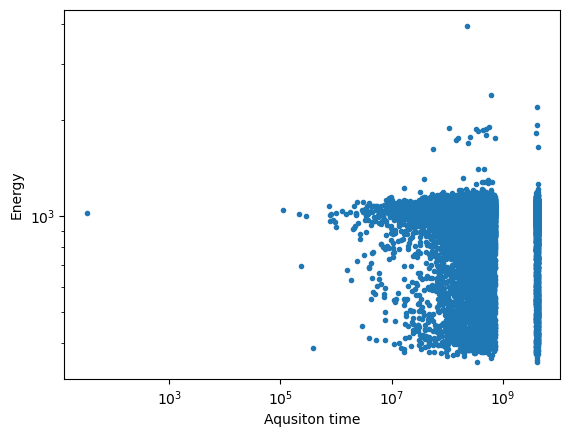

In [128]:
plt.plot((data_['time']),(data_['pha']),".")
plt.xlabel("Aqusiton time")
plt.ylabel("Energy")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 100000000)

Text(0, 0.5, 'No. of Counts')

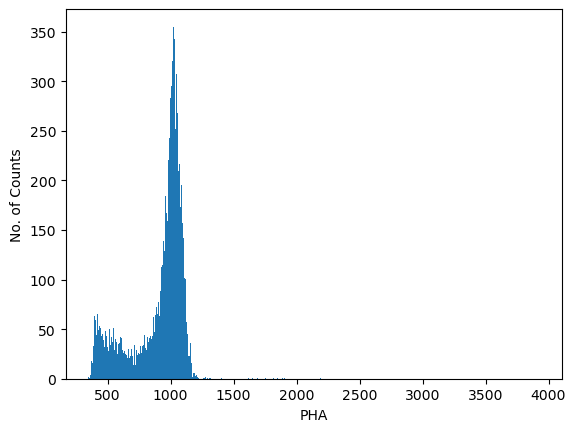

In [129]:
# %matplotlib notebook
N,bins,_ = plt.hist(data_['pha'], bins=750)
plt.xlabel("PHA")
plt.ylabel("No. of Counts")
# plt.ylim(0,100)
# plt.show()

In [130]:
len(N)

750

In [131]:
bin_centers = (bins[:-1] + bins[1:]) / 2

In [132]:
def gauss(x,amp,mean,stdev):
    return amp*np.exp(-(x-mean)**2/(2*stdev**2))

In [133]:
gauss(1,10,9.3,0.3)

6.107321563648419e-166

In [134]:
p0 = [np.max(N),np.mean(data_['pha']),np.std(data_['pha'])]

In [135]:
p0

[355.0, 906.3034703604409, 213.5569504189879]

In [136]:
from scipy.optimize import curve_fit

In [137]:
params, pcov = curve_fit(gauss,bin_centers,N,p0)
errors = np.sqrt(np.diag(pcov))

In [138]:
print("Fit results")
for p,e in zip(params, errors):
    print(f"{p:0.1f} +- {e:0.1f}")
print("Approximate resolution : {:0.1f}%".format(100* 2.35 * params[2] / params[1]))

Fit results
292.5 +- 4.0
1023.7 +- 1.0
63.6 +- 1.0
Approximate resolution : 14.6%


In [139]:
fit_curve = gauss(bin_centers,*params)

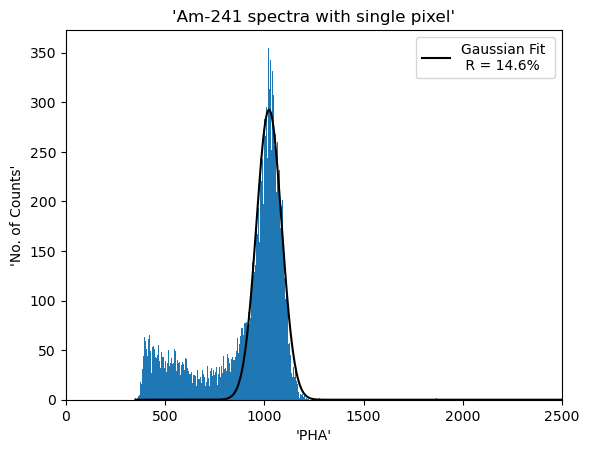

In [142]:
plt.plot(bin_centers, fit_curve, 'k-', label='Gaussian Fit \n R = 14.6%')
N,bins,_ = plt.hist(data_['pha'], bins=750)
plt.title("'Am-241 spectra with single pixel'")
plt.xlabel("'PHA'")
plt.legend()
plt.ylabel("'No. of Counts'")
plt.xlim(0,2500)
#plt.grid()
plt.show()


k = params[1]
k

In [64]:
59*(1- 2.35 * params[2] / params[1])*4096/200

1031.861328963898